<a href="https://colab.research.google.com/github/mhaidar10/machine-leaning-pemula-dc/blob/main/01_Supervised_dan_Unsupervised_Learning/04_Latihan_SKLearn_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Learning : K-Means Clustering.**

dataset link url :
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

## K-Means

 Tujuan utama dari K-Means adalah untuk mengelompokkan data ke dalam kelompok atau kluster berdasarkan kesamaan fitur di antara mereka.

Animasi di bawah adalah bagaimana K-Means bekerja pada data 2 dimensi.

In [28]:
from IPython.display import Image
Image(url='https://lh3.googleusercontent.com/R7DC4KEuS9Lnv0457zCHYPxzDiR-IhFv6XlhEEl4kFtH7UpfOVEnefgpy_IsHoipW62I6idy_-8a1B0RA_fZ8oGcK_PQ470NgDC8FHc-_bPAn9tql8gh1pgbIFdaXi6_Vqz2moip')

## Metode Elbow

adalah Cara paling mudah untuk menentukan jumlah K atau klaster pada K-means adalah dengan melihat langsung persebaran data.

Metode elbow bertujuan untuk menentukan elbow, yaitu jumlah K yang optimal. Untuk menentukan elbow, perlu dilakukan secara manual, yaitu dengan melihat titik dimana penurunan inersia tidak lagi signifikan.

In [18]:
import pandas as pd

#ubah file csv menjadi dataframe
df = pd.read_csv('Mall_Customers.csv')

# tampilkan 3 baris pertama
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [19]:
# ubah nama kolom
df = df.rename(columns={
      'Gender': 'gender',
      'Age': 'age',
      'Annual Income (k$)': 'annual_income',
      'Spending Score (1-100)': 'spending_score'
    })

# ubah data kategorik menjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


Di thap ini akan mengimpor K-Means.Selain itu menghilangkan kolom Customer ID dan gender karena kurang relevan untuk proses clustering. Selanjutnya  akan menentukan nilai K yang optimal dengan metode Elbow. Library K-means dari SKLearn menyediakan fungsi untuk menghitung inersia dari K-Means dengan jumlah K tertentu. Di sini  akan membuat list yang berisi inersia dari nilai K antara 1 sampai 11.

In [20]:
from sklearn.cluster import KMeans

# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID', 'gender'], axis=1)

#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Berdasarkan grafik, dapat dilihat pada titik 5 terjadi lengkungan yang cukup tajam. Sehingga dapat di ambil kesimpulan bahwa K=5 merupakan nilai yang optimal.

Text(0, 0.5, 'Inertia')

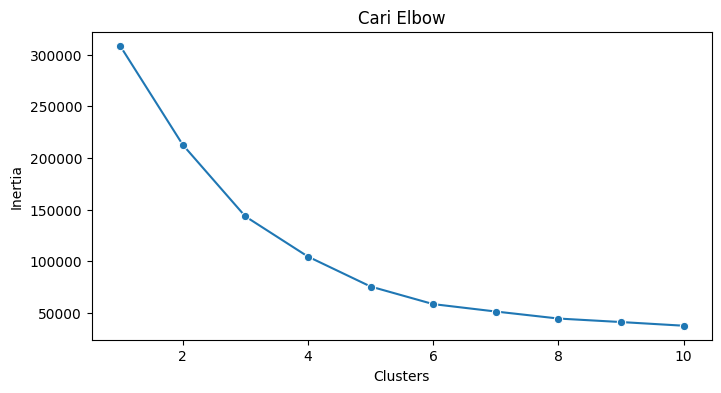

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(
    x=list(range(1, 11)),
    y=clusters,
    ax=ax,
    marker='o'
  )
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

melatih kembali K-Means dengan jumlah K yang didapat dari metode Elbow. Lalu kita bisa membuat plot hasil pengklasteran K-Means dengan menjalankan kode di bawah.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


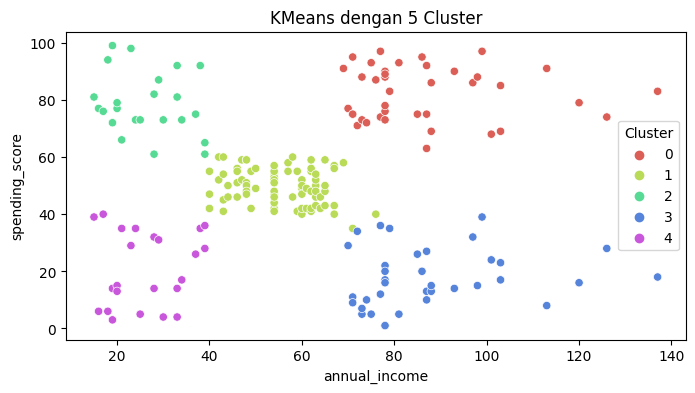

In [29]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

# menambahkan kolom Cluster pada dataset
X['Cluster'] = km5.labels_

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(
    x=X['annual_income'],
    y=X['spending_score'],
    hue=X['Cluster'],
    palette=sns.color_palette('hls', 5)
)

plt.title('KMeans dengan 5 Cluster')
plt.show()